Code to apply fastcda stability analysis on R34 Happiness cases

In [ ]:
# import needed packages
from fastcda import FastCDA
from dgraph_flex import DgraphFlex
import semopy
import pprint as pp

In [ ]:
# create  an instance of FastCDA
fc = FastCDA()

In [16]:
# read in the sample ema dataset and view it
file = 'R34B23.csv' # works
file = 'R34B13.csv' # problem with semopy
df = fc.getSampleData(file)
df

,PainIntensity,PainControl,PainConcerned,PainAffectFunc,PainFearfulMove,P_Active,P_Determined,P_Attentive,P_Inspired,P_Alert,...,P_Ashamed_,ControlLife_,BodyEnergy_,BodyRelax_,MindRelax_,SpatialSpan3_,SpatialSpan4_,SpatialSpan5_,GridA_secs_,GridB_secs_
0,-0.119191,1.670862,-0.331364,0.245153,0.466892,1.096930,-0.019602,1.520485,1.089324,0.962455,...,0.0,2.730256,1.178236,-0.410122,-2.415423,-1.325532,-2.752418,-1.236686,4.284790,8.035039
1,-1.283594,1.670862,-0.331364,-2.349386,0.466892,1.096930,-0.019602,1.520485,0.033262,0.962455,...,0.0,2.730256,1.178236,1.217549,-0.783728,-0.422891,0.325121,-0.667631,5.840231,4.992233
2,-0.119191,1.670862,-2.806852,-2.349386,-1.577775,1.096930,-0.019602,-0.971148,1.089324,0.962455,...,0.0,0.895640,1.178236,1.217549,-0.783728,0.479750,-0.700726,-1.805741,1.085398,0.795124
3,-0.119191,-0.097467,-0.331364,0.245153,-1.577775,-0.217316,-0.019602,0.274668,1.089324,0.029388,...,0.0,2.730256,1.178236,-0.410122,-2.415423,0.479750,-2.239495,0.470478,1.379157,1.046417
4,2.209615,-1.865796,2.144123,0.245153,0.466892,1.096930,1.225137,0.274668,-1.022801,-1.836746,...,0.0,0.895640,-0.207282,-0.410122,0.847968,0.479750,-1.470110,-0.667631,0.371869,0.303251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,-2.447996,-1.865796,-0.331364,0.245153,-1.577775,-1.531563,-2.509081,-2.216965,-2.078863,0.029388,...,0.0,-0.938977,1.178236,-0.410122,0.847968,-0.874211,0.838044,1.039533,-0.348296,-0.461109
123,-0.119191,-0.097467,-0.331364,0.245153,0.466892,-0.217316,-0.019602,0.274668,0.033262,0.029388,...,0.0,-0.938977,-1.592801,1.217549,0.847968,0.479750,-0.700726,-0.667631,-0.379533,-0.419730
124,1.045212,-0.097467,-0.331364,-2.349386,0.466892,-0.217316,-0.019602,0.274668,-1.022801,0.029388,...,0.0,-0.938977,1.178236,-0.410122,0.847968,-0.874211,-0.700726,0.470478,-0.471456,-0.546288
125,-1.283594,-0.097467,-0.331364,0.245153,0.466892,-1.531563,-0.019602,0.274668,-1.022801,0.029388,...,0.0,-0.938977,-0.207282,-0.410122,0.847968,0.479750,0.838044,1.608588,-0.515991,-0.610947


In [17]:
# create the prior knowledge
knowledge = fc.create_lag_knowledge(df.columns, lag_stub = '_')


In [18]:
# Run the search
SearchResult, graph = fc.run_model_search( df, 
                                    model='gfci', 
                                    knowledge=knowledge, 
                                    score={'sem_bic': {'penalty_discount': 1.0}},
                                    test={'fisher_z': {'alpha': .01}})


Singularity encountered when scoring PainIntensity | P_Afraid
Singularity encountered when scoring PainIntensity | P_upset
Singularity encountered when scoring PainIntensity | P_Hostile
Singularity encountered when scoring PainIntensity | P_Ashamed
Singularity encountered when scoring PainIntensity | P_Afraid_
Singularity encountered when scoring PainIntensity | P_Hostile_
Singularity encountered when scoring PainIntensity | P_Ashamed_
Singularity encountered when scoring PainControl | P_Afraid
Singularity encountered when scoring PainControl | P_upset
Singularity encountered when scoring PainControl | P_Hostile
Singularity encountered when scoring PainControl | P_Ashamed
Singularity encountered when scoring PainControl | P_Afraid_
Singularity encountered when scoring PainControl | P_Hostile_
Singularity encountered when scoring PainControl | P_Ashamed_
Singularity encountered when scoring PainConcerned | P_Afraid
Singularity encountered when scoring PainConcerned | P_upset
Singularity

In [19]:
# searchResult has multiple keys, the one we are generally interested in is 'edges'
print(f"Number of edges found: {len(SearchResult['edges'])} edges.")
SearchResult['edges']

Number of edges found: 66 edges.


['ControlLife_ --> ControlLife',
 'ControlLife_ --> P_Inspired',
 'P_Active_ --> P_Alert_',
 'BodyEnergy_ --> P_Alert_',
 'P_Nervous_ o-> PainConcerned',
 'P_Determined_ --> P_Attentive_',
 'GridB_secs o-o P_upset_',
 'BodyEnergy --> BodyRelax',
 'P_Nervous_ o-> ControlLife',
 'PainFearfulMove_ --> PainIntensity_',
 'BodyRelax_ --> PainConcerned_',
 'P_Determined --> P_Inspired_',
 'P_Alert --> P_Active',
 'P_Nervous --> ControlLife',
 'P_upset_ --> GridA_secs_',
 'ControlLife --> MindRelax',
 'PainControl_ o-> ControlLife_',
 'MindRelax_ --> BodyRelax_',
 'P_Attentive --> SpatialSpan4_',
 'PainControl_ o-o BodyEnergy_',
 'P_Attentive_ --> PainIntensity_',
 'P_Inspired_ --> P_Determined_',
 'P_Active_ --> P_Determined_',
 'P_Active_ --> PainAffectFunc',
 'PainIntensity --> PainConcerned',
 'BodyEnergy_ --> P_Attentive_',
 'PainFearfulMove_ o-> BodyEnergy',
 'ControlLife --> P_Active_',
 'GridB_secs_ --> GridA_secs_',
 'PainFearfulMove --> PainAffectFunc',
 'P_Inspired --> SpatialSpan5_

In [ ]:
# Show the graph
graph.show_graph()

In the next section, we perform a stability analysis to determine which edges are most stable while resampling the data.

We do 100 runs using a subsample of 90% of the original data without substitution.

We keep edges that are present with at least a fraction of 0.75.

StabilityResult['edges'] contains the edges that were found 0.75 of the time.

A graph object is returned which includes the SEM results.

If the argument "lag_stub" is set to a string, then lag variables are added to the dataframe.

In [ ]:
# remove columns that end with _
# Identify columns to drop
cols_to_drop = [col for col in df.columns if col.endswith('_')]

# Drop the identified columns
df_cleaned = df.drop(columns=cols_to_drop)
df_cleaned.shape

In [21]:
# run the stability search
StabilityResult, graph = fc.run_stability_search(
                                        df_cleaned, 
                                        model='gfci',
                                        knowledge=knowledge,
                                        score={'sem_bic': {'penalty_discount': 1.0}},
                                        test={'fisher_z': {'alpha': .01}},
                                        lag_stub = '_',
                                        )

pass

Running stability search with 100 runs:   0%|          | 0/100 [00:00<?, ?run/s]

Singularity encountered when scoring PainIntensity | P_Afraid
Singularity encountered when scoring PainIntensity | P_upset
Singularity encountered when scoring PainIntensity | P_Hostile
Singularity encountered when scoring PainIntensity | P_Ashamed
Singularity encountered when scoring PainIntensity | P_Afraid_
Singularity encountered when scoring PainIntensity | P_upset_
Singularity encountered when scoring PainIntensity | P_Hostile_
Singularity encountered when scoring PainIntensity | P_Ashamed_
Singularity encountered when scoring PainControl | P_Afraid
Singularity encountered when scoring PainControl | P_upset
Singularity encountered when scoring PainControl | P_Hostile
Singularity encountered when scoring PainControl | P_Ashamed
Singularity encountered when scoring PainControl | P_Afraid_
Singularity encountered when scoring PainControl | P_upset_
Singularity encountered when scoring PainControl | P_Hostile_
Singularity encountered when scoring PainControl | P_Ashamed_
Singularity 

In [22]:
# number of edges
print(f"Number of edges found: {len(StabilityResult['edges'])} edges.")
StabilityResult['edges']

Number of edges found: 11 edges.


['ControlLife_ --> ControlLife',
 'MindRelax --> BodyRelax',
 'MindRelax_ --> BodyRelax_',
 'P_Alert_ --> P_Inspired_',
 'P_Attentive --> PainIntensity',
 'P_Attentive_ --> PainIntensity_',
 'P_Determined --> P_Inspired_',
 'P_Inspired_ --> P_Determined_',
 'P_Nervous_ --> PainAffectFunc_',
 'PainFearfulMove --> PainAffectFunc',
 'PainFearfulMove_ --> PainAffectFunc_']

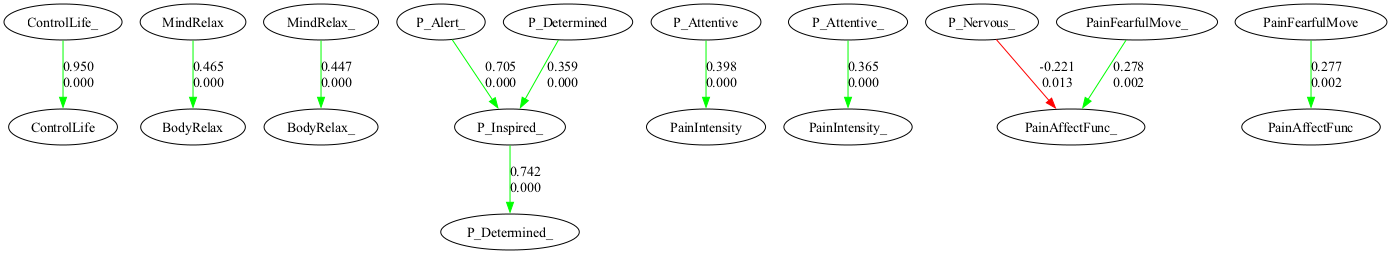

In [23]:
# show the graph
graph.show_graph()

The last graph was created using a threshold of 0.75 for an edge to be included in the graph.  Let's change the threshold to  0.9.

In [24]:
# Let's get a new set of edges based on the min_fraction of 0.9
frac = 0.90
selected_edges = fc.select_edges( StabilityResult['sorted_edge_counts'],
                                 min_fraction=frac)

# number of edges
print(f"Number of edges using a fraction  of {frac} produces {len(selected_edges)} edges.")
selected_edges

Number of edges using a fraction  of 0.9 produces 1 edges.


['P_Inspired_ --> P_Determined_']

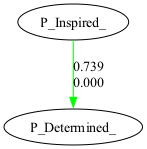

In [25]:
# run the sem and create a new graph
obj = DgraphFlex()
obj.add_edges(selected_edges)

# run the sem
lavaan_model = fc.edges_to_lavaan(selected_edges)
sem_results = fc.run_semopy(lavaan_model, df)
# add the semopy results to the graph object
fc.add_sem_results_to_graph(obj, sem_results['estimates'])
# save the graph to a png file
obj.show_graph()